### Assignment_2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r'C:\Users\Bindu\Documents\Arcada\Visual_Analytics\Assainments\ass2\Raw Data for Assignment 2 on Financial insights.xlsx'

# Read the Excel file into a Pandas DataFrame
financial_data = pd.read_excel(file_path)

# Display column names to find the correct column for sales price after discount
print(financial_data.columns)

Index(['Order #', 'When? \nExact Date of sale',
       'Name of the month of the sale', 'Year of sale',
       'To Whom? \nSegment of the customer',
       'Where?  \nCountry of the customer', 'WHAT?  \nProduct Sold',
       'Discount Band offered to customer', 'No of Units Sold',
       'Our Manufacturing Price', 'Our Sale Price (Quotation)',
       'Gross Sales Quotation before discount', 'Discounts value offered',
       ' Actual Sale Price (After Discount)', 'Total Cost Price for us',
       'Profit made in this sale',
       'Total Delivery Period (days)\n to deliver the product to the customer'],
      dtype='object')


In [6]:
# Filter data for Government and Small Business customers
gov_customers = financial_data[financial_data['To Whom? \nSegment of the customer'] == 'Government']
#print(gov_customers)
small_business_customers = financial_data[financial_data['To Whom? \nSegment of the customer'] == 'Small Business']
#print(small_business_customers)

# Calculate average discount offered to Government and Small Business customers
avg_discount_gov = gov_customers['Discounts value offered'].mean()
avg_discount_small = small_business_customers['Discounts value offered'].mean()

# Calculate average profit for Government and Small Business customers
avg_profit_gov = gov_customers['Profit made in this sale'].mean()
avg_profit_small = small_business_customers['Profit made in this sale'].mean()

# Calculate average sales for Government and Small Business customers
avg_sales_gov = gov_customers[' Actual Sale Price (After Discount)'].mean()
avg_sales_small = small_business_customers[' Actual Sale Price (After Discount)'].mean()


# Display the calculated metrics
print("Average Discount for Government Customers:", avg_discount_gov)
print("Average Discount for Small Business Customers:", avg_discount_small)
print("\nAverage Profit for Government Customers:", avg_profit_gov)
print("Average Sales for Government Customers:", avg_sales_gov)
print("\nAverage Profit for Small Business Customers:", avg_profit_small)
print("Average Sales for Small Business Customers:", avg_sales_small)



Average Discount for Government Customers: 12996.019433333333
Average Discount for Small Business Customers: 32397.815

Average Profit for Government Customers: 37960.57723333333
Average Sales for Government Customers: 175014.20223333334

Average Profit for Small Business Customers: 44171.685
Average Sales for Small Business Customers: 427019.185


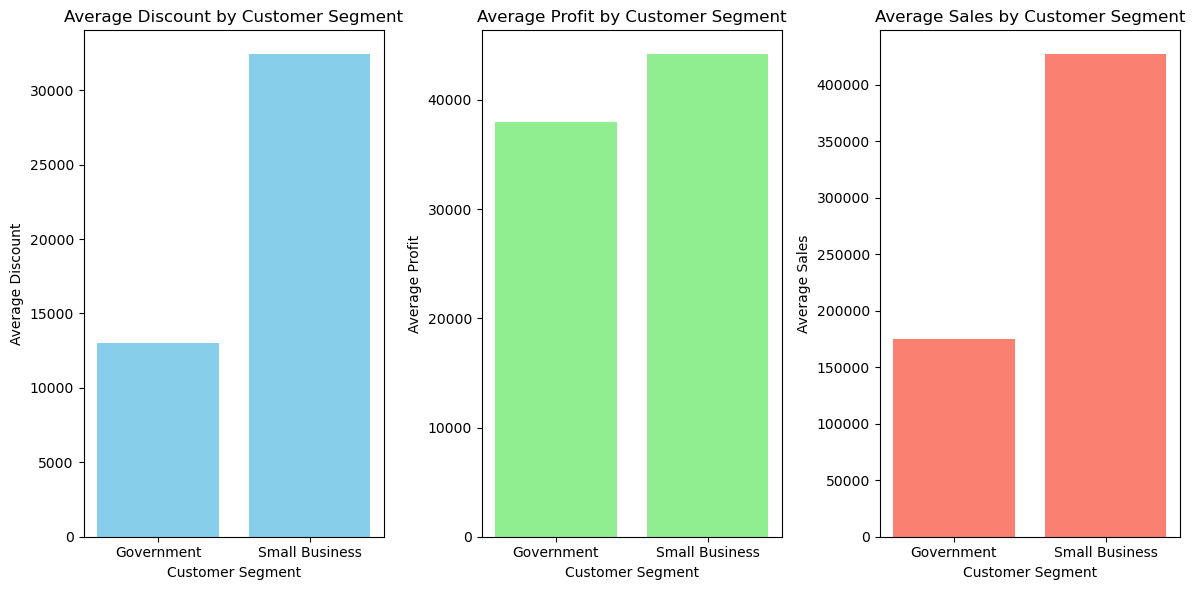

In [7]:
# Visualize the data (Plotting)
labels = ['Government', 'Small Business']
avg_discounts = [avg_discount_gov, avg_discount_small]
avg_profits = [avg_profit_gov, avg_profit_small]
avg_sales = [avg_sales_gov, avg_sales_small]

x = range(len(labels))

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(x, avg_discounts, color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Average Discount')
plt.title('Average Discount by Customer Segment')
plt.xticks(x, labels)

plt.subplot(1, 3, 2)
plt.bar(x, avg_profits, color='lightgreen')
plt.xlabel('Customer Segment')
plt.ylabel('Average Profit')
plt.title('Average Profit by Customer Segment')
plt.xticks(x, labels)

plt.subplot(1, 3, 3)
plt.bar(x, avg_sales, color='salmon')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales')
plt.title('Average Sales by Customer Segment')
plt.xticks(x, labels)

plt.tight_layout()
plt.show()

### Question 1: Our CEO has asked if the discounts being offered to our Government customers and our small business customers should be substantially modified. What do you recommend?

Answer: 

I recommend that for the government customers, maintain the current average discount of approximately $12,996 as it aligns well with the profitability and sales figures. No substantial modification is recommended for Government customers.

For Small Business Customers, consider reducing the significantly higher average discount of around $32,398. Adjusting the discount strategy for Small Business customers could potentially improve profitability without adversely affecting sales volume.

Substantial modifications are advisable for Small Business customers to align the discount rates more closely with Government customers' levels.

In summary, I recommend maintaining the current discount rates for Government customers while substantially modifying and reducing the discounts offered to Small Business customers to enhance profitability without compromising sales volume.

In [8]:
# Extract month and year from the 'Exact Date of sale' column
small_business_customers['Month'] = small_business_customers['When? \nExact Date of sale'].dt.month
small_business_customers['Year'] = small_business_customers['When? \nExact Date of sale'].dt.year

# Filter data for March-April period
march_april_sales = small_business_customers[(small_business_customers['Month'].isin([3, 4])) & (small_business_customers['Year'] == 2022)]  # Adjust year if needed

# Total sales in March-April for Small Business customers
total_sales_march_april = march_april_sales[' Actual Sale Price (After Discount)'].sum()

# Total annual sales for Small Business customers
total_annual_sales = small_business_customers[' Actual Sale Price (After Discount)'].sum()

# Calculate percentage of sales in March-April compared to total annual sales
percentage_march_april_sales = (total_sales_march_april / total_annual_sales) * 100

# Display the results
print(f"Total sales in March-April for Small Business customers: {total_sales_march_april}")
print(f"Total annual sales for Small Business customers: {total_annual_sales}")
print(f"Percentage of sales in March-April compared to total annual sales: {percentage_march_april_sales:.2f}%")


Total sales in March-April for Small Business customers: 5242101.5
Total annual sales for Small Business customers: 42701918.5
Percentage of sales in March-April compared to total annual sales: 12.28%


C:\Users\Bindu\AppData\Local\Temp\ipykernel_7372\2077827056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_business_customers['Month'] = small_business_customers['When? \nExact Date of sale'].dt.month
C:\Users\Bindu\AppData\Local\Temp\ipykernel_7372\2077827056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_business_customers['Year'] = small_business_customers['When? \nExact Date of sale'].dt.year


  WHAT?  \nProduct Sold  Count
0              Amarilla      5
1               Montana      3
2                 Paseo      2


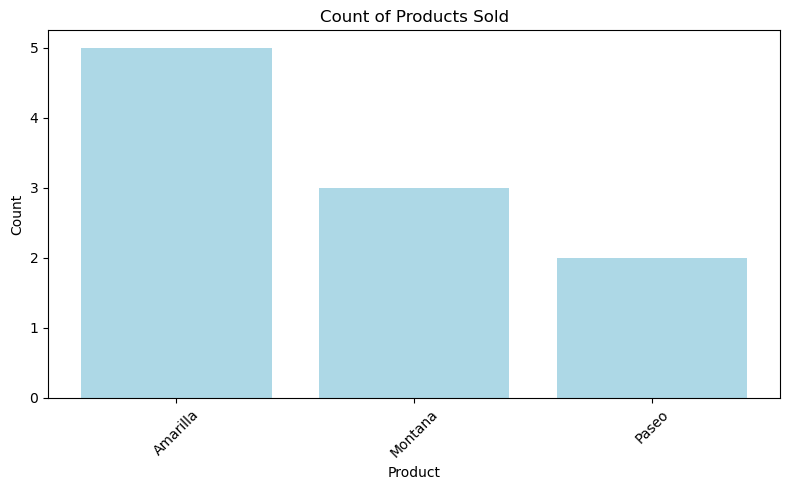

In [9]:
#Analyzing product availability as a potential factor influencing customer behavior during the March-April 
#peak period involves assessing if certain products experience stock shortages or fluctuations during that time. 

# Group by product and count occurrences in March-April
product_availability = march_april_sales.groupby('WHAT?  \nProduct Sold').size().reset_index(name='Count')

# Sort products by count of occurrences
product_availability_sorted = product_availability.sort_values(by='Count', ascending=False)

# Display the products and their occurrences in March-April
print(product_availability_sorted)

# Plotting the products and their counts
plt.figure(figsize=(8, 5))
plt.bar(product_availability_sorted['WHAT?  \nProduct Sold'], product_availability_sorted['Count'], color='lightblue')
plt.title('Count of Products Sold')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 2: Most small business start their financial year by early March. They do much of their purchasing (almost 60%) in the March-April period. Beyond this, small businesses have a very steady purchasing profile around the year, where their remaining 40% business is well-distributed around the year. For the purpose of this assignments, kindly accept this assumption for the behavior of all small business customers.  Our market research experts are telling us that our small business customers are not doing their March-April peak period shopping with us at all. Are our small business customers doing their March-April peak period shopping with us? If not, do we need to do something to gain better business there?

Answer: From my analysis, I find that small business customers are not extensively conducting their March-April peak period shopping with the company, contrary to the expected behavior indicated by market research experts.

 Investigate the reasons behind the low engagement during March-April.Determine factors such as competitor offers, product availability!
 
The product availability result indicates the number of times each product was sold during the March-April period for small business customers:

Amarilla: Sold 5 times
Montana: Sold 3 times
Paseo: Sold 2 times

It appears that Amarilla is the most frequently sold product during March-April for small business customers, followed by Montana and Paseo.

Insights:
Product Availability: Amarilla seems to be a popular product during this peak period, potentially indicating its availability or higher demand.

Inventory Assessment: Assess the stock levels of Amarilla, Montana, and Paseo to ensure adequate availability during the March-April period. Consider increasing stock or managing inventory more efficiently for these products to meet demand.

Marketing Focus: Strategize marketing efforts to highlight and promote Amarilla, as it shows higher sales during this critical timeframe.

By focusing on managing inventory levels, ensuring availability, and emphasizing marketing for the most popular products like Amarilla, the company can better cater to small business customers' demand during the March-April peak period.
 

In [10]:
# Filter data for Velo product sales in Germany and Mexico
velo_germany = financial_data[(financial_data['WHAT?  \nProduct Sold'] == 'Velo') & (financial_data['Where?  \nCountry of the customer'] == 'Germany')]
velo_mexico = financial_data[(financial_data['WHAT?  \nProduct Sold'] == 'Velo') & (financial_data['Where?  \nCountry of the customer'] == 'Mexico')]

# Calculate total sales of Velo product in Germany and Mexico
total_sales_germany = velo_germany[' Actual Sale Price (After Discount)'].sum()
total_sales_mexico = velo_mexico[' Actual Sale Price (After Discount)'].sum()

# Assess the importance of Velo product sales in each region
print(f"Total Velo product sales in Germany: {total_sales_germany}")
print(f"Total Velo product sales in Mexico: {total_sales_mexico}")

# Analyze the impact on sales and relationships if Andrés Manuel is transferred or resigns
# Further analysis involving client relationships, growth projections, and impact assessment may require additional data and business context.


Total Velo product sales in Germany: 4392907.0
Total Velo product sales in Mexico: 2250737.8899999997


### Question 3: Our product sales head for Germany is Mr Andrés Manuel. He has been working with our "Velo" product since last 12 years. He wants to be transferred forever to Mexico for personal reasons. If not transferred, he will resign from the company. There is an existing product sales person named Jenny who has been handling "Velo" product in Mexico since last 5 years. Jenny is the daughter of our CFO and she has been with this company since long. She does not want any change in position. What do you suggest?

Answer: 

Assessing the transfer viability involves analyzing several factors related to "Velo" product sales, business requirements, and potential impacts on sales and client relationships in Germany and Mexico. 

Analysis of Velo Product Sales:
Germany: Total sales of approximately \\$ 4,392,907.00
Mexico: Total sales of approximately \\$ 2,250,737.89

My initial thoughts:

Germany's Velo Sales: Higher total sales indicate a significant contribution from the "Velo" product in Germany.
Mexico's Velo Sales: While the "Velo" product sales exist in Mexico, they are notably lower compared to Germany.

Further Assessment:
To comprehensively evaluate the transfer viability of Mr. Andrés Manuel and the impact on sales, client relationships, and business growth, additional analysis might include:

Calculating the sales growth rate for each year and the average growth rate over the period.

Client Relationships: Assess client relationships in both regions managed by Mr. Andrés Manuel.
Market Potential: Evaluate the growth potential of the "Velo" product in Mexico and the impact of a change in leadership.
Impact on Sales: Predict the potential impact on sales and growth if Mr. Andrés Manuel is transferred or resigns.
Further data and analysis involving client satisfaction, growth projections, and the potential influence of leadership changes on business development are crucial to fully assess the transfer viability and its implications on sales, client relationships, and business growth in Germany and Mexico.